<a href="https://colab.research.google.com/github/Afaryudha/universitas/blob/main/kecerdasan_buatan4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

data_folder = '/content/drive/MyDrive/NLP-with-Python-master/NLP-with-Python-master/data'
print(os.listdir(data_folder))


['Seattle_Hotels_Duplicates.csv', 'quora_sample.csv', 'comment_backToWork.csv', 'small_vocab_en', 'Seattle_Hotels_dirty.csv', 'title_conference.csv', 'corona_fake.csv', 'ner_dataset.csv', 'small_vocab_fr', 'comment_on_plan.csv']


In [ ]:
import os

folder_path = ('/content/drive/MyDrive/NLP-with-Python-master/NLP-with-Python-master/data')
print(os.listdir(folder_path))


['Seattle_Hotels_Duplicates.csv', 'quora_sample.csv', 'comment_backToWork.csv', 'small_vocab_en', 'Seattle_Hotels_dirty.csv', 'title_conference.csv', 'corona_fake.csv', 'ner_dataset.csv', 'small_vocab_fr', 'comment_on_plan.csv']


In [ ]:
import pandas as pd

df = pd.read_csv(f'{folder_path}/corona_fake.csv', encoding='ISO-8859-1')
print(df.head())


                                            ï»¿title  \
0  Due to the recent outbreak for the Coronavirus...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                text  \
0  You just need to add water, and the drugs and ...   
1  Hydroxychloroquine has been shown to have a 10...   
2  Fact: Hydroxychloroquine has been shown to hav...   
3  The Corona virus is a man made virus created i...   
4  Doesnât @BillGates finance research at the W...   

                      source label  
0  coronavirusmedicalkit.com  Fake  
1               RudyGiuliani  Fake  
2                CharlieKirk  Fake  
3    JoanneWrightForCongress  Fake  
4    JoanneWrightForCongress  Fake  


In [ ]:
df.isnull().sum()

,0
ï»¿title,82
text,10
source,20
label,5


In [ ]:
df.shape

(1164, 4)

In [ ]:
df.dropna(axis=0, inplace=True)
df.shape

(1059, 4)

In [ ]:
df.isnull().sum()

,0
ï»¿title,0
text,0
source,0
label,0


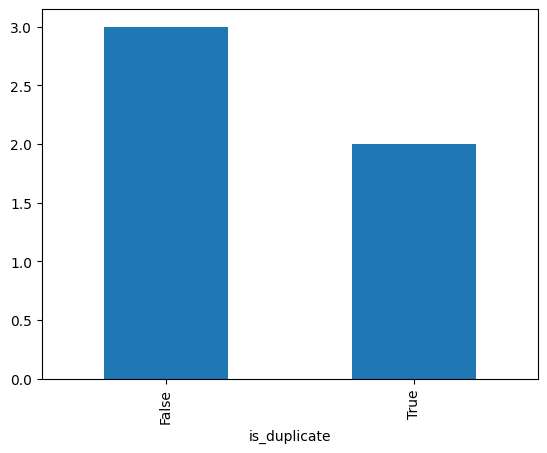

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh data
data = {
    'id': [1, 2, 3, 4, 5],
    'title': ['a', 'b', 'a', 'c', 'b']
}
df = pd.DataFrame(data)

# Tandai duplikat berdasarkan kolom 'title'
df['is_duplicate'] = df.duplicated(subset=['title'])

# Plot jumlah berdasarkan apakah duplikat atau tidak
df.groupby('is_duplicate')['id'].count().plot.bar()
plt.show()


In [ ]:
df.drop(['id', 'qid1', 'qid2'], axis=1, inplace=True, errors='ignore'); df.shape


(5, 2)

In [ ]:
print(df.columns)
df.columns = df.columns.str.strip()


Index(['title', 'is_duplicate'], dtype='object')


In [ ]:
for _, row in df.iterrows():
    print("Title:", row['title'])
    print("Is Duplicate:", row['is_duplicate'])
    print()


Title: a
Is Duplicate: False

Title: b
Is Duplicate: False

Title: a
Is Duplicate: True

Title: c
Is Duplicate: False

Title: b
Is Duplicate: True



In [ ]:
SPECIAL_TOKENS = {
    'quoted': 'quoted_item',
    'non-ascii': 'non_ascii_word',
    'undefined': 'something'
}

def clean(text, stem_words=True):
    import re
    from string import punctuation
    from nltk.stem import SnowballStemmer
    from nltk.corpus import stopwords

    def pad_str(s):
        return ' '+s+' '

    if pd.isnull(text):
        return ''

#    stops = set(stopwords.words("english"))
    # Clean the text, with the option to stem words.

    # Empty question

    if type(text) != str or text=='':
        return ''

    # Clean the text
    text = re.sub("\'s", " ", text) # we have cases like "Sam is" or "Sam's" (i.e. his) these two cases aren't separable, I choose to compromise are kill "'s" directly
    text = re.sub(" whats ", " what is ", text, flags=re.IGNORECASE)
    text = re.sub("\'ve", " have ", text)
    text = re.sub("can't", "can not", text)
    text = re.sub("n't", " not ", text)
    text = re.sub("i'm", "i am", text, flags=re.IGNORECASE)
    text = re.sub("\'re", " are ", text)
    text = re.sub("\'d", " would ", text)
    text = re.sub("\'ll", " will ", text)
    text = re.sub("e\.g\.", " eg ", text, flags=re.IGNORECASE)
    text = re.sub("b\.g\.", " bg ", text, flags=re.IGNORECASE)
    text = re.sub("(\d+)(kK)", " \g<1>000 ", text)
    text = re.sub("e-mail", " email ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?U\.S\.A\.", " America ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?United State(s)?", " America ", text, flags=re.IGNORECASE)
    text = re.sub("\(s\)", " ", text, flags=re.IGNORECASE)
    text = re.sub("[c-fC-F]\:\/", " disk ", text)

    # remove comma between numbers, i.e. 15,000 -> 15000

    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)

#     # all numbers should separate from words, this is too aggressive

#     def pad_number(pattern):
#         matched_string = pattern.group(0)
#         return pad_str(matched_string)
#     text = re.sub('[0-9]+', pad_number, text)

    # add padding to punctuations and special chars, we still need them later

    text = re.sub('\$', " dollar ", text)
    text = re.sub('\%', " percent ", text)
    text = re.sub('\&', " and ", text)

#    def pad_pattern(pattern):
#        matched_string = pattern.group(0)
#       return pad_str(matched_string)
#    text = re.sub('[\!\?\@\^\+\*\/\,\~\|\`\=\:\;\.\#\\\]', pad_pattern, text)

    text = re.sub('[^\x00-\x7F]+', pad_str(SPECIAL_TOKENS['non-ascii']), text) # replace non-ascii word with special word

    # indian dollar

    text = re.sub("(?<=[0-9])rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(" rs(?=[0-9])", " rs ", text, flags=re.IGNORECASE)

    # clean text rules get from : https://www.kaggle.com/currie32/the-importance-of-cleaning-text
    text = re.sub(r" (the[\s]+|The[\s]+)?US(A)? ", " America ", text)
    text = re.sub(r" UK ", " England ", text, flags=re.IGNORECASE)
    text = re.sub(r" india ", " India ", text)
    text = re.sub(r" switzerland ", " Switzerland ", text)
    text = re.sub(r" china ", " China ", text)
    text = re.sub(r" chinese ", " Chinese ", text)
    text = re.sub(r" imrovement ", " improvement ", text, flags=re.IGNORECASE)
    text = re.sub(r" intially ", " initially ", text, flags=re.IGNORECASE)
    text = re.sub(r" quora ", " Quora ", text, flags=re.IGNORECASE)
    text = re.sub(r" dms ", " direct messages ", text, flags=re.IGNORECASE)
    text = re.sub(r" demonitization ", " demonetization ", text, flags=re.IGNORECASE)
    text = re.sub(r" actived ", " active ", text, flags=re.IGNORECASE)
    text = re.sub(r" kms ", " kilometers ", text, flags=re.IGNORECASE)
    text = re.sub(r" cs ", " computer science ", text, flags=re.IGNORECASE)
    text = re.sub(r" upvote", " up vote", text, flags=re.IGNORECASE)
    text = re.sub(r" iPhone ", " phone ", text, flags=re.IGNORECASE)
    text = re.sub(r" \0rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(r" calender ", " calendar ", text, flags=re.IGNORECASE)
    text = re.sub(r" ios ", " operating system ", text, flags=re.IGNORECASE)
    text = re.sub(r" gps ", " GPS ", text, flags=re.IGNORECASE)
    text = re.sub(r" gst ", " GST ", text, flags=re.IGNORECASE)
    text = re.sub(r" programing ", " programming ", text, flags=re.IGNORECASE)
    text = re.sub(r" bestfriend ", " best friend ", text, flags=re.IGNORECASE)
    text = re.sub(r" dna ", " DNA ", text, flags=re.IGNORECASE)
    text = re.sub(r" III ", " 3 ", text)
    text = re.sub(r" banglore ", " Banglore ", text, flags=re.IGNORECASE)
    text = re.sub(r" J K ", " JK ", text, flags=re.IGNORECASE)
    text = re.sub(r" J\.K\. ", " JK ", text, flags=re.IGNORECASE)

    # replace the float numbers with a random number, it will be parsed as number afterward, and also been replaced with word "number"

    text = re.sub('[0-9]+\.[0-9]+', " 87 ", text)


    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation]).lower()
       # Return a list of words
    return text

In [ ]:
['title', 'is_duplicate']
df['title'] = df['title'].apply(clean)


In [ ]:
a = 0
for i in range(a, min(a + 10, len(df))):
    print(df['title'].iloc[i])
    print(df['is_duplicate'].iloc[i])
    print()


a
False

b
False

a
True

c
False

b
True



In [ ]:
X = df.loc[:, df.columns != 'is_duplicate']
y = df.loc[:, df.columns == 'is_duplicate']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

transformer = FeatureUnion([
                ('question1_bow',
                  Pipeline([('extract_field',
                              FunctionTransformer(lambda x: x['question1'],
                                                  validate=False)),
                            ('bow',
                              CountVectorizer())])),
                ('question2_bow',
                  Pipeline([('extract_field',
                              FunctionTransformer(lambda x: x['question2'],
                                                  validate=False)),
                            ('bow',
                              CountVectorizer())]))])

In [ ]:
texts_train = ['b', 'c', 'b']

from sklearn.feature_extraction.text import CountVectorizer

transformer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
X_train_count = transformer.fit_transform(texts_train)

print(X_train_count.shape)
print(transformer.get_feature_names_out())


(3, 2)
['b' 'c']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Transform data test harus dari list teks, bukan dataframe langsung
texts_test = X_test['title'].tolist()
X_test_count = transformer.transform(texts_test)

# Latih model dengan data train yang sudah transformasi
rf = RandomForestClassifier()
rf.fit(X_train_count, y_train.values.ravel())

# Prediksi data test
y_pred = rf.predict(X_test_count)

# Evaluasi hasil prediksi
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.50      1.00      0.67         1
        True       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

texts_test = X_test['title'].tolist()
X_test_count = transformer.transform(texts_test)

logreg = LogisticRegression()
logreg.fit(X_train_count, y_train.values.ravel())

y_pred = logreg.predict(X_test_count)
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.50      1.00      0.67         1
        True       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

transformer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
X_train_count = transformer.fit_transform(texts_train)
X_test_count = transformer.transform(texts_test)

tfidf_trfm = TfidfTransformer(norm=None)
X_train_count_tfidf = tfidf_trfm.fit_transform(X_train_count)
X_test_count_tfidf = tfidf_trfm.transform(X_test_count)

rf = RandomForestClassifier()
rf.fit(X_train_count_tfidf, y_train.values.ravel())

y_pred = rf.predict(X_test_count_tfidf)

print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.50      1.00      0.67         1
        True       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

transformer = FeatureUnion([
                ('question1_tfidf',
                  Pipeline([('extract_field',
                              FunctionTransformer(lambda x: x['question1'],
                                                  validate=False)),
                            ('tfidf',
                              TfidfVectorizer())])),
                ('question2_tfidf',
                  Pipeline([('extract_field',
                              FunctionTransformer(lambda x: x['question2'],
                                                  validate=False)),
                            ('tfidf',
                              TfidfVectorizer())]))])

In [ ]:
texts_train = X_train['title'].tolist()
texts_test = X_test['title'].tolist()

In [ ]:
X_train_tfidf.shape

(3, 2)

In [ ]:
def randomforest_classify(X_tr, y_tr, X_test, y_test, description):
    ### Helper function to train a random forest classifier and score on test data
    m = RandomForestClassifier().fit(X_tr, y_tr)
    s = m.score(X_test, y_test)
    print ('Test score with', description, 'features:', s)
    return m

m_bow = randomforest_classify(X_train_count, y_train.values.ravel(), X_test_count, y_test.values.ravel(), 'bow')
m_tfidf = randomforest_classify(X_train_tfidf, y_train.values.ravel(), X_test_tfidf, y_test.values.ravel(), 'tf-idf')

Test score with bow features: 0.5
Test score with tf-idf features: 0.5


In [ ]:
y_pred = logreg.predict(X_test_tfidf)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.50      1.00      0.67         1
        True       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
